Imports 

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import datasets, linear_model

In [98]:
## Reading Data From XML
df = pd.read_csv('data.csv')
X = preprocessing.scale(df)
df.head()

,latitude,longitude,avail,amount,predict
0,19.2372,72.8441,2,5,5
1,19.1998,19.1998,3,7,2
2,19.1802,72.8554,4,10,4
3,19.0213,72.8424,1,5,6
4,19.0213,72.8424,5,5,1


In [99]:
### Applying a clustering algorithm
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [100]:
### Found the centrois i.e. donors and potential Volunteers
centroids = clf.cluster_centers_
labels = clf.labels_
print(centroids)

[[-0.45097502  0.42655413 -0.62629458 -0.31366061  0.58976782]
 [ 0.56371877 -0.53319266  0.78286822  0.39207576 -0.73720978]]


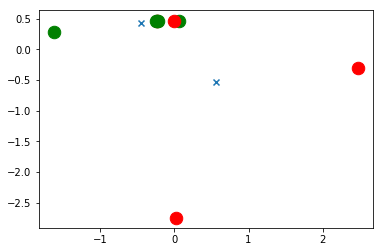

In [101]:
### PLotting the data
colors = 10*["g.","r.","c.","b.","k."]

for i in range(len(X)):
    plt.plot(X[i][0],X[i][1], colors[labels[i]],markersize=25)

plt.scatter(centroids[:,0],centroids[:,1],marker='x')
plt.show()

In [102]:
from sklearn import linear_model
import matplotlib.pyplot as plt
Y = df['amount']
X = df['avail']
X_test = df['predict']

X = np.array(X)
X.reshape(1,-1)

array([[2, 3, 4, 1, 5, 3, 2, 3, 3]], dtype=int64)

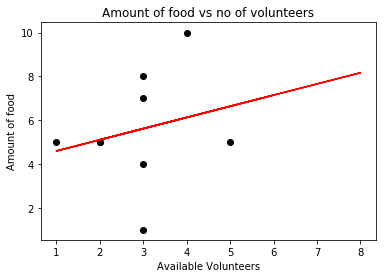

In [103]:
from sklearn import linear_model
import matplotlib.pyplot as plt
Y_train = np.array(df['amount'])
X_train = np.array(df['avail'])
X_test = np.array(df['predict'])
X_test = X_test.reshape(-1,1)
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)


plt.scatter(X,Y,color='black')
plt.title('Amount of food vs no of volunteers')
plt.xlabel('Available Volunteers')
plt.ylabel('Amount of food')

regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)

plt.plot(X_test, regr.predict(X_test),color='red')
plt.show()